### Thresholding

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

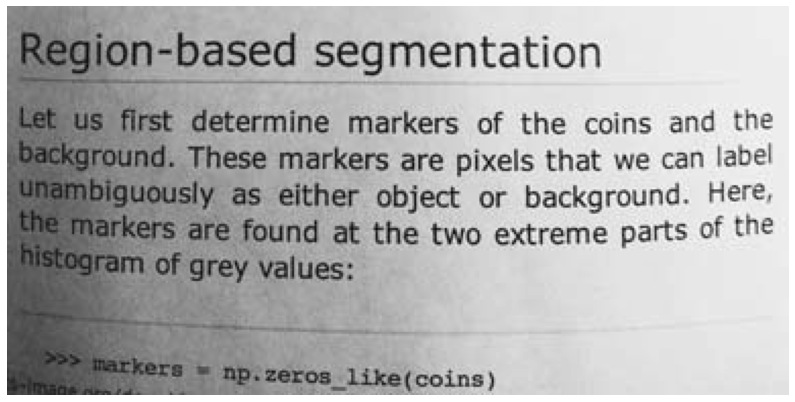

In [1]:
import numpy as np
import skimage.data as data
import skimage.draw as draw
import skimage.color as color
import matplotlib.pyplot as plt
import skimage.filters as filters
import skimage.segmentation as seg

def image_show(image, nrow=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrow, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

text = data.page()
image_show(text)

(0.0, 256.0)

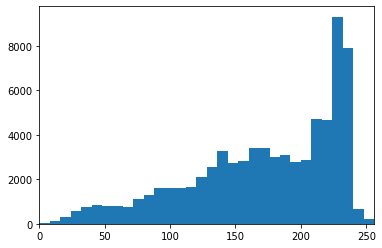

In [2]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256)

#### Supervised Thresholding

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

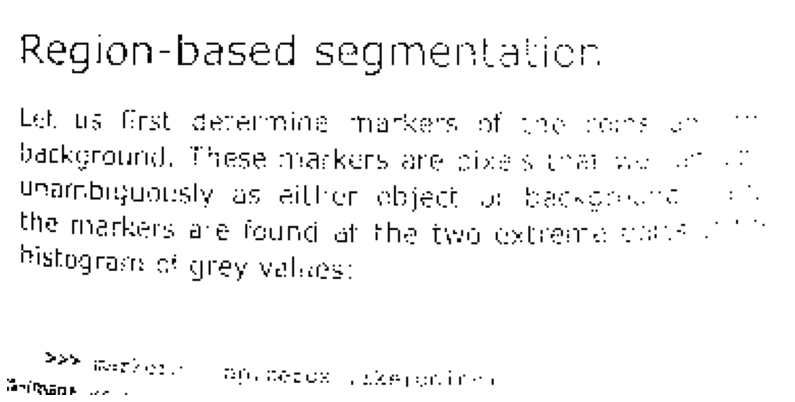

In [3]:
text_segmented = text > 50
image_show(text_segmented)

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

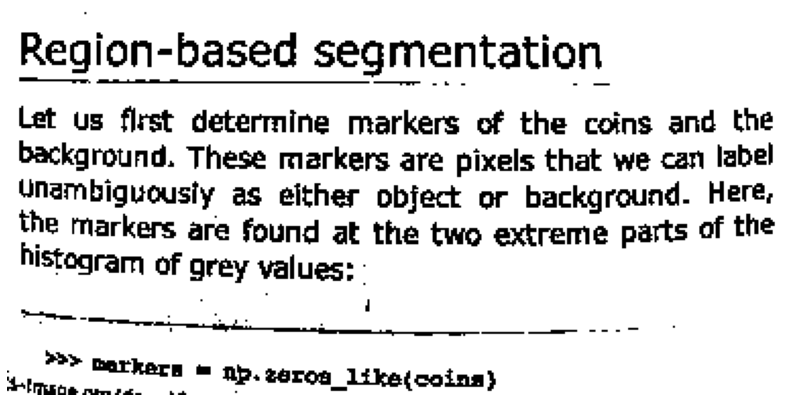

In [4]:
text_threshold = filters.threshold_local(text, block_size=51, offset=10)
image_show(text > text_threshold)

### Supervised Segmentation

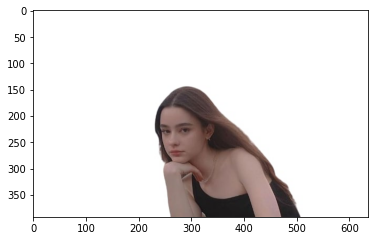

In [5]:
# Import the image
from skimage import io
image = io.imread('./img/dasha.jpg')
plt.imshow(image);

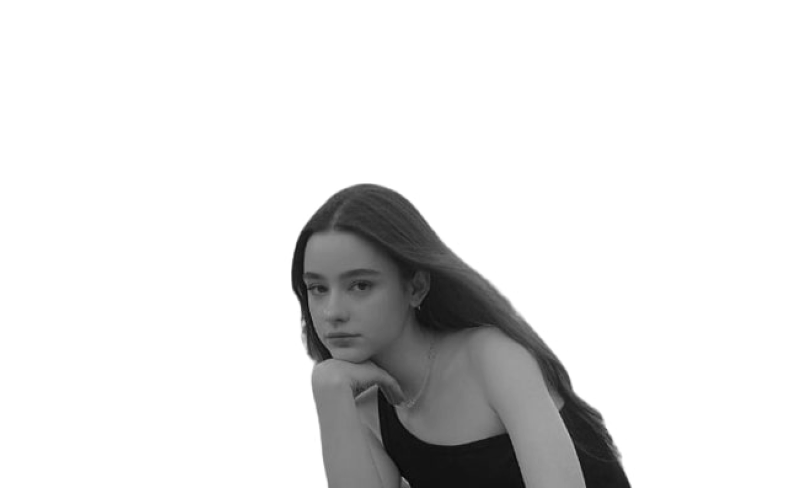

In [6]:
image_gray = color.rgb2gray(image)
image_show(image_gray);

### Random Walker

In [7]:
def circle_points(resolution, center, radius):
    """
    Generate points which defines a circle on an image. Center refer to the center of the image
    """
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius * np.cos(radians)
    r = center[0] + radius * np.sin(radians)

    return np.array([c, r]).T

points = circle_points(200, [225, 285], 80)[:-1]

In [8]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

D:\Anaconda\envs\graph-nx\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


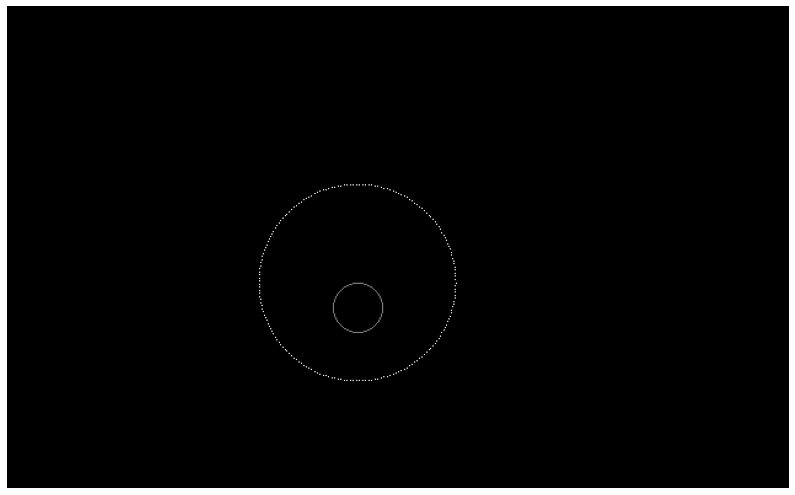

In [9]:
indices = draw.circle_perimeter(245, 285, 20)#from here
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

C:\Users\firqa\AppData\Roaming\Python\Python37\site-packages\skimage\_shared\utils.py:348: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  return func(*args, **kwargs)


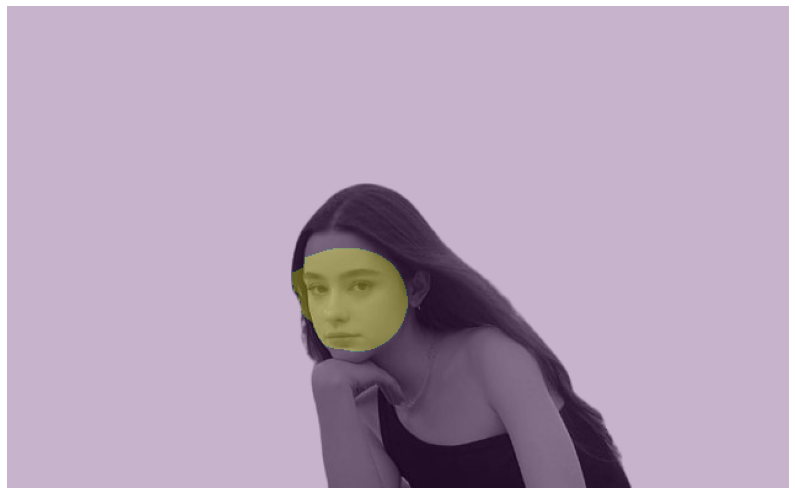

In [10]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

C:\Users\firqa\AppData\Roaming\Python\Python37\site-packages\skimage\_shared\utils.py:348: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  return func(*args, **kwargs)


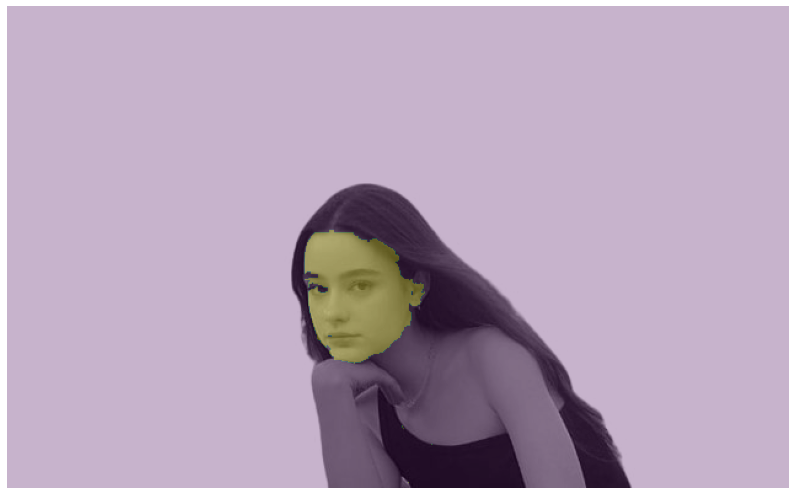

In [11]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 25000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

### Unsupervised Segmentation
### SLIC (Simple Linear Iterative Clustering)

In [12]:
image_slic = seg.slic(image,n_segments=155)

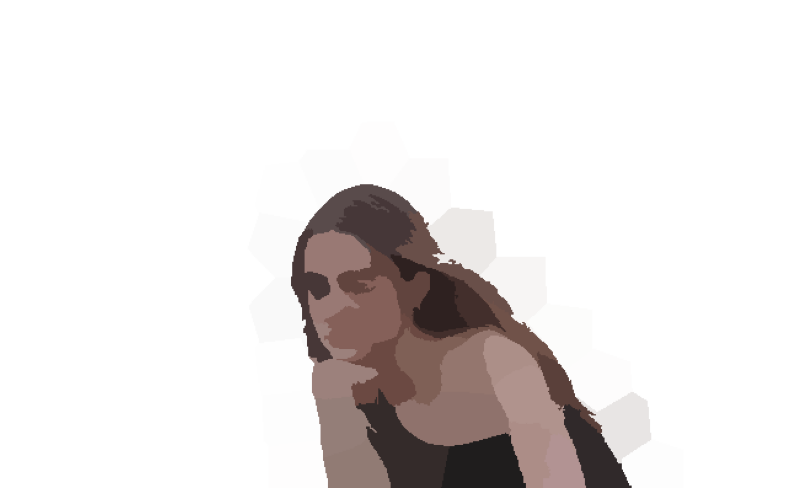

In [13]:
image_show(color.label2rgb(image_slic, image, kind='avg'));